Deber: https://es.bccrwp.org/compare/hello-world-program-in-keras-with-cnn-dog-vs-cat-classification-f5f294/ hacer funcionar

https://medium.com/@adriaciurana/aprende-deep-learning-en-10-minutos-e4e9e8950cd8

https://www.floydhub.com/fastai/datasets/cats-vs-dogs


Video Explicativo: https://www.youtube.com/watch?v=SgFjjWqhvXM&list=PLdAlEumy7j9lRFe-SA5aEthPpwhuxXAyV&index=5


#Ejemplo 1

Otros Ejemplos: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


https://es.bccrwp.org/compare/hello-world-program-in-keras-with-cnn-dog-vs-cat-classification-f5f294/

In [1]:
#from __future__ import absolute_import, division, print_function, unicode_litera ls
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Actualizacion Tensorflow
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#Cargar datos
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract= True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # directory with our validation dog pictures

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
#Impresion
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
#Variables
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [7]:
#Preparacion de datos
#Leer imágenes del disco.
#Decodifica el contenido de estas imágenes y las convierte al formato adecuado según su contenido RGB.
#Conviérte las imagenes en tensores de coma flotante.
#Cambia la escala de los tensores de valores entre 0 y 255 a valores entre 0 y 
# 1, ya que las redes neuronales prefieren tratar con valores de entrada pequeños.
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our t raining data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir, shuffle=True, 
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')


Found 2000 images belonging to 2 classes.


In [8]:
 print(train_data_gen)

In [9]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


[[[0.63529414 0.57254905 0.5137255 ]
  [0.63529414 0.57254905 0.5137255 ]
  [0.63529414 0.57254905 0.5137255 ]
  ...
  [0.22352943 0.21960786 0.20000002]
  [0.21960786 0.21568629 0.19607845]
  [0.21568629 0.21176472 0.19215688]]

 [[0.63529414 0.57254905 0.5137255 ]
  [0.63529414 0.57254905 0.5137255 ]
  [0.63529414 0.57254905 0.5137255 ]
  ...
  [0.19607845 0.20000002 0.1764706 ]
  [0.19607845 0.20000002 0.1764706 ]
  [0.19607845 0.20000002 0.1764706 ]]

 [[0.63529414 0.57254905 0.5137255 ]
  [0.63529414 0.57254905 0.5137255 ]
  [0.63529414 0.57254905 0.5137255 ]
  ...
  [0.18431373 0.18823531 0.16862746]
  [0.17254902 0.1764706  0.15686275]
  [0.17254902 0.1764706  0.15686275]]

 ...

 [[0.6862745  0.64705884 0.60784316]
  [0.6862745  0.64705884 0.60784316]
  [0.6862745  0.64705884 0.60784316]
  ...
  [0.29803923 0.35686275 0.38431376]
  [0.2901961  0.34117648 0.37254903]
  [0.28627452 0.3372549  0.36862746]]

 [[0.68235296 0.6431373  0.6039216 ]
  [0.6862745  0.64705884 0.60784316]


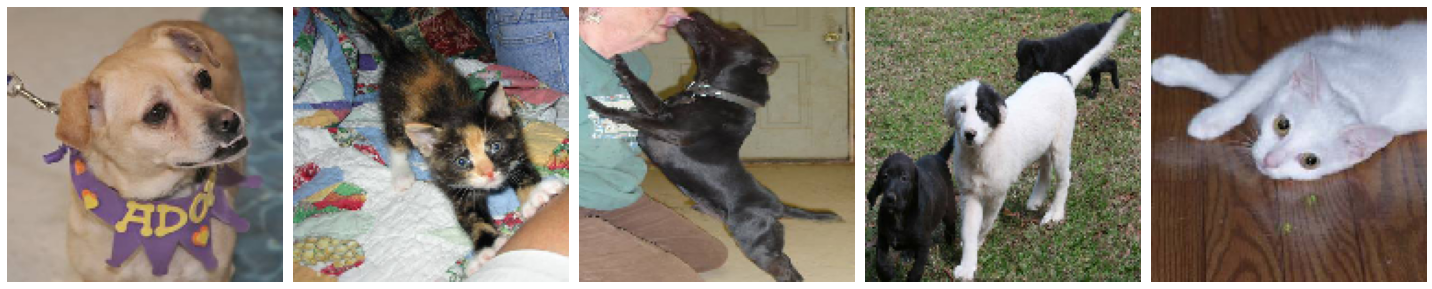

In [10]:
#Visualizacion fotos
sample_training_images, _ = next(train_data_gen)
print(sample_training_images[0])
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20)) 
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImages(sample_training_images[:5])

In [11]:
sample_training_images, _ = next(train_data_gen)
print(len(sample_training_images))

128


In [12]:
#Crear modelo
#El modelo consta de tres bloques de convolución con una capa de agrupación máxi ma en cada uno de ellos.
#Hay una capa completamente conectada con 512 unidades con funcion de activacion RELU.
#El modelo genera probabilidades de clase basadas en la clasificación binaria po r la sigmoidfunción de activación.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, 
                                                                  IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [13]:
#Entrenamiento
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - ETA: 0s - batch: 7.0000 - size: 124.8000 - loss: 1.1345 - acc: 0.4877WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
15/15 [==============================] - 4s 268ms/step - batch: 7.0000 - size: 124.8000 - loss: 1.1345 - acc: 0.4877 - val_loss: 0.6946 - val_acc: 0.4855
Epoch 2/15
15/15 [==============================] - 8s 520ms/step - batch: 7.0000 - size: 124.8000 - loss: 0.6927 - acc: 0.5096 - val_loss: 0.6928 - val_acc: 0.4855
Epoch 3/15
15/15 [==============================] - 8s 515ms/step - batch: 7.0000 - size: 124.8000 - loss: 0.6909 - acc: 0.5465 - 

In [14]:
 model.metrics_names

['loss', 'acc']

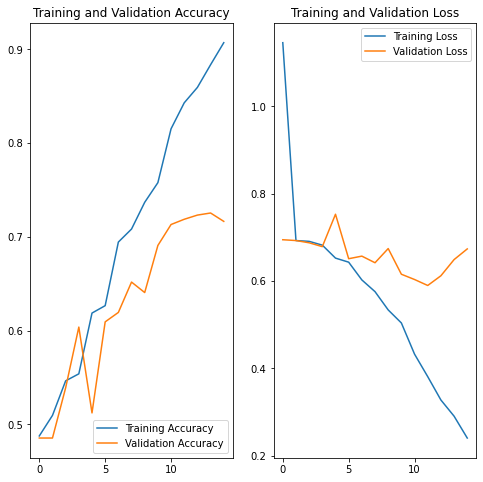

In [15]:
#Visualizacion de Resultados
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Generacion de más imágenes

In [16]:
#Voldeo Horizontal
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True) 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)] # Re-use the same custom plotting function defined and used
# above to visualize the training images plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


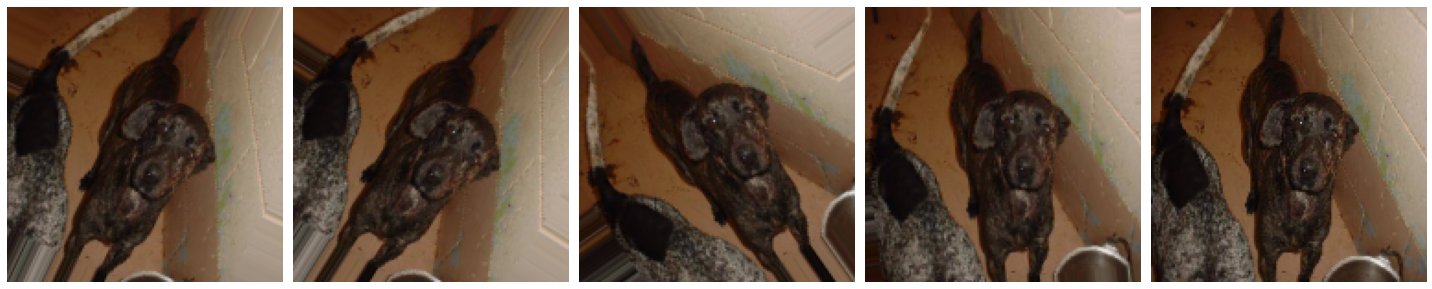

In [18]:
#Rotacion
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


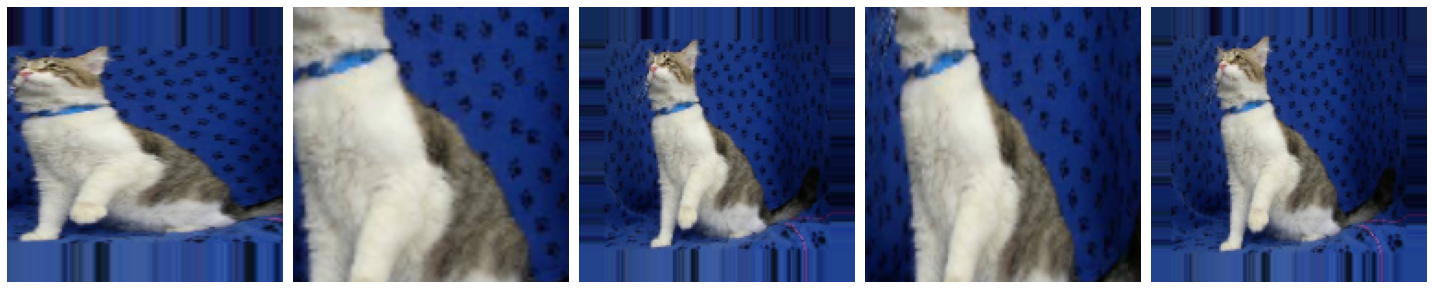

In [20]:
#Aumento de zoom
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) #
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


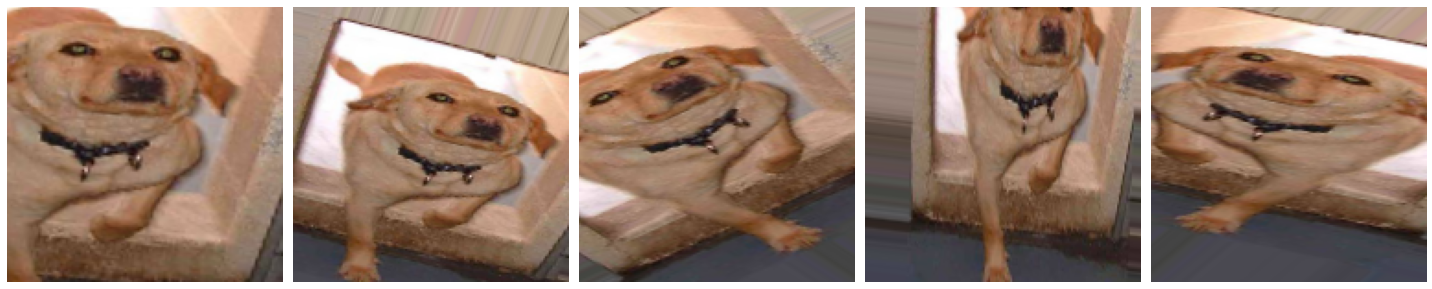

In [23]:
#Union de todas las imagenes
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=45, 
                                     width_shift_range=.15, height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
directory=train_dir, shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)] 
plotImages(augmented_images)

In [24]:
#datos de validacion
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')
print(val_data_gen)

Found 1000 images belonging to 2 classes.


In [25]:
#Cracion del modelo
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
#Compilacion del modelo
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [26]:
#Entrenamiento
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 14s 959ms/step - batch: 7.0000 - size: 124.8000 - loss: 1.1067 - acc: 0.5037 - val_loss: 0.6892 - val_acc: 0.4888
Epoch 2/15
15/15 [==============================] - 16s 1s/step - batch: 7.0000 - size: 128.0000 - loss: 0.6929 - acc: 0.5234 - val_loss: 0.6847 - val_acc: 0.5290
Epoch 3/15
15/15 [==============================] - 15s 990ms/step - batch: 7.0000 - size: 121.6000 - loss: 0.6781 - acc: 0.5504 - val_loss: 0.6744 - val_acc: 0.5134
Epoch 4/15
15/15 [==============================] - 15s 991ms/step - batch: 7.0000 - size: 128.0000 - loss: 0.6722 - acc: 0.5766 - val_loss: 0.6434 - val_acc: 0.6306
Epoch 5/15
15/15 [==============================] - 15s 983ms/step - batch: 7.0000 - size: 124.8000 - loss: 0.6464 - acc: 0.6031 - val_loss: 0.6408 - val_acc: 0.6362
Epoch 6/15
15/15 [==============================] - 14s 946ms/step - batch: 7.0000 - size: 121.6000 - loss: 0.6486 - acc: 0.6343 - val_loss: 0.6286 - val_acc: 0.6362
Epoch 7

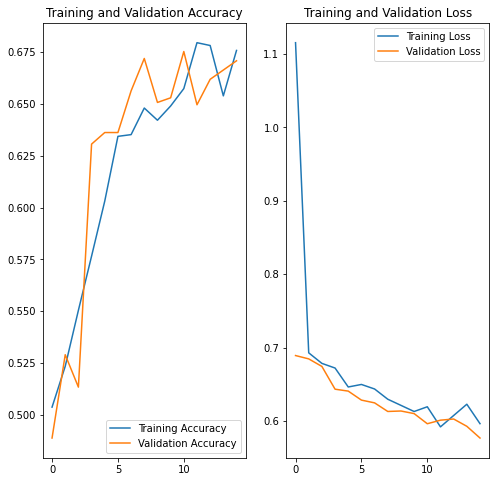

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()